In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the train dataset
df=pd.read_csv("train.csv")
dataset=df.copy()
#We will build our preprocessedDataset step by step
preprocessedDataset=pd.DataFrame()
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
#Let's see features
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

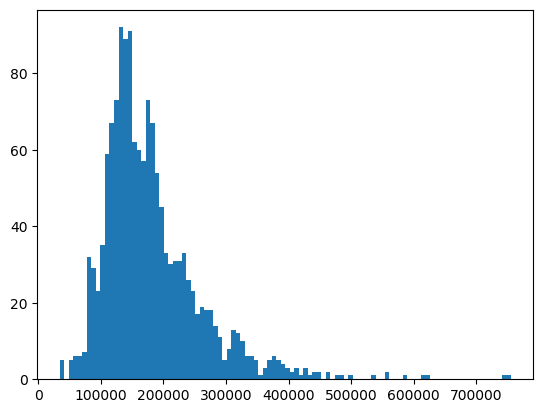

In [4]:
#First, analyze and try to get insight from target for this regression problem
plt.hist(np.array(dataset[["SalePrice"]]),bins=100)
plt.show()
#It seems right-skewed target data
#Statistically Outlier can be found using : IQ=75%-25% => (25%-1.5*IQ,%75+1.5*IQ) outside of these points can accept as outliers
#Later, we should identify cause of the outliers to generate reasonable preprocessed output. Which features effect the outliers? 

In [5]:
targetDataStats=dataset["SalePrice"].describe().astype(float)
print(targetDataStats)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [6]:
IQ=targetDataStats["75%"]-targetDataStats["25%"]#IQ:Interquartile
rightSideLimit=targetDataStats["75%"]+1.5*IQ
leftSideLimit=targetDataStats["25%"]-1.5*IQ
print("Lower Bound :"+str(leftSideLimit))
print("Upper Bound :"+str(rightSideLimit))
#We can statistically consider the values bigger than upper bound are outliers

Lower Bound :3937.5
Upper Bound :340037.5


[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
Nan Values  0


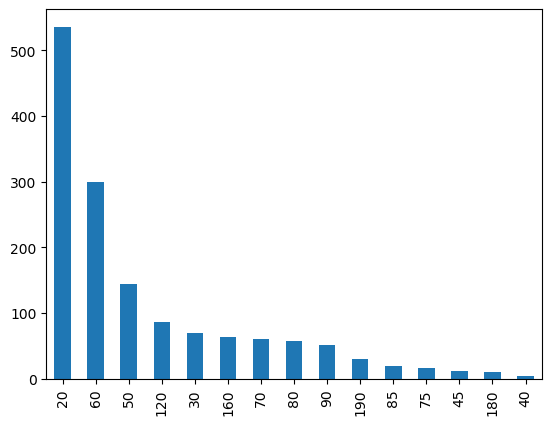

In [7]:
#ID feature is not informative for ML model, so we ignore it,but only used for identifying houses in the last prediction section
#First Feature : MSSubClass : Categorical-Nominal Data, type :int64
"""
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
"""
print(dataset["MSSubClass"].unique())
print(dataset["MSSubClass"].value_counts())
print("Nan Values  " + str(dataset.MSSubClass.isna().sum()))
dataset["MSSubClass"].value_counts().plot(kind='bar')
plt.show()

In [8]:
#We will semantically group categories 
#the categories; [20,30,40,120], [45,50,150], [60,70,75,160],[80,85,90,180,190] 
#=>With respect to the data description, train data does not include example of 150,
#anyway we will include into group due to probability of seeing in test data.

#Get dummies
MSSubClass_columns = pd.get_dummies(dataset["MSSubClass"])
MSSubClassGroup1=MSSubClass_columns[[20,30,40,120]].max(axis=1)
try:
    MSSubClassGroup2=MSSubClass_columns[[45,50,150]].max(axis=1)
except:
    MSSubClassGroup2=MSSubClass_columns[[45,50]].max(axis=1)
MSSubClassGroup3=MSSubClass_columns[[60,70,75,160]].max(axis=1)
MSSubClassGroup4=MSSubClass_columns[[80,85,90,180,190]].max(axis=1)
preprocessedDataset["MSSubClassGroup1"]=MSSubClassGroup1.copy().astype(float)
preprocessedDataset["MSSubClassGroup2"]=MSSubClassGroup2.copy().astype(float)
preprocessedDataset["MSSubClassGroup3"]=MSSubClassGroup3.copy().astype(float)
preprocessedDataset["MSSubClassGroup4"]=MSSubClassGroup4.copy().astype(float)
dataset=dataset.drop(columns=['MSSubClass'])

['RL' 'RM' 'C (all)' 'FV' 'RH']
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


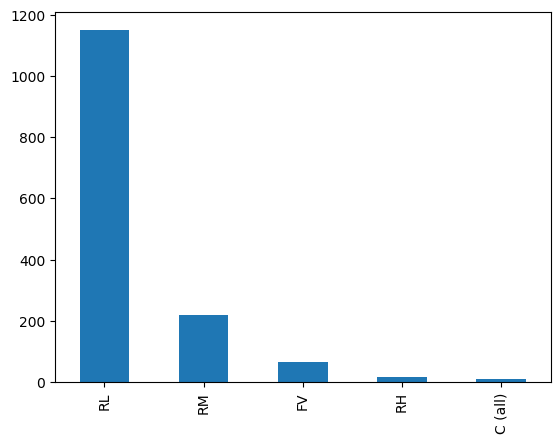

In [9]:
#Next Feature : MSZoning : Identifies the general zoning classification of the sale. Categorical-Nominal Data, type :str
"""
MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
"""
print(dataset["MSZoning"].unique())
print(dataset["MSZoning"].value_counts())
dataset["MSZoning"].value_counts().plot(kind='bar')
plt.show()

In [10]:
MSZoning=dataset.pop('MSZoning')
MSZoning.isna().sum()

0

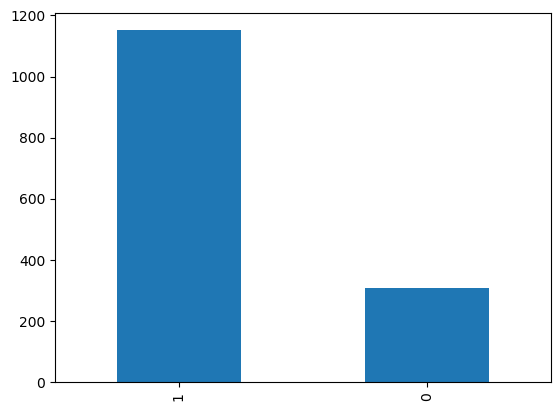

In [11]:
#According to the zoning hist and results, there are 5 cotegories and mostly balanced on RL	Residential Low Density (RL)
#So we will divide it on two binary categories which RL:1 and others:0
MSZoning=MSZoning.map({"RL":1,'RM':0,'C (all)':0, 'FV':0, 'RH':0,'A':0,'I':0,'RP':0})
#Let's see the result
MSZoning.value_counts().plot(kind='bar')
plt.show()

In [12]:
#Add MSZoning on preprocessedDataset
preprocessedDataset["MSZoning"]=MSZoning.copy().astype(float)

['Pave' 'Grvl']
Pave    1454
Grvl       6
Name: Street, dtype: int64


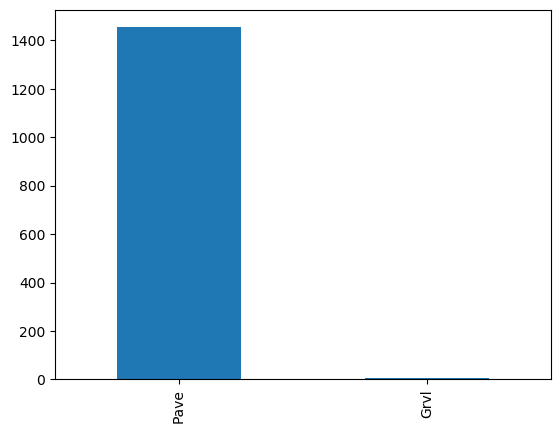

In [13]:
#Next Feature will be another categorical, first we will finish our job with categorical features.
"""Street: Type of road access to property

       Grvl Gravel
       Pave Paved
"""
print(dataset["Street"].unique())
print(dataset["Street"].value_counts())
dataset["Street"].value_counts().plot(kind='bar')
plt.show()
#The Street feature is not informative due to over-imbalanced values, as an instinct, also, I don't believe that it will be useful in multivariate data.
#We will simply drop it

In [14]:
dataset=dataset.drop(columns=["Street"])

[nan 'Grvl' 'Pave']
Grvl    50
Pave    41
Name: Alley, dtype: int64
Nan Values  1369


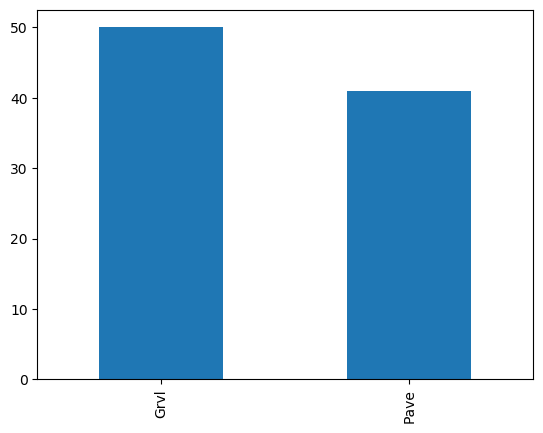

In [15]:
#Next Categorical Feature
"""Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
"""
print(dataset["Alley"].unique())
print(dataset["Alley"].value_counts())
print("Nan Values  " + str(dataset.Alley.isna().sum()))
dataset["Alley"].value_counts().plot(kind='bar')
plt.show()


In [16]:
Grvl=int(dataset["Alley"].value_counts()["Grvl"])
Pave=int(dataset["Alley"].value_counts()["Pave"])
NanVal=dataset.Alley.isna().sum()
percentageOfNoneVal=NanVal/(NanVal+Pave+Grvl)
print("Percentage of None Values : "+str(percentageOfNoneVal))
#Over 90% none values can be dangerous for data, therefore we will simply drop this feature.

Percentage of None Values : 0.9376712328767123


In [17]:
dataset=dataset.drop(columns=["Alley"])

['Reg' 'IR1' 'IR2' 'IR3']
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Nan Values  0


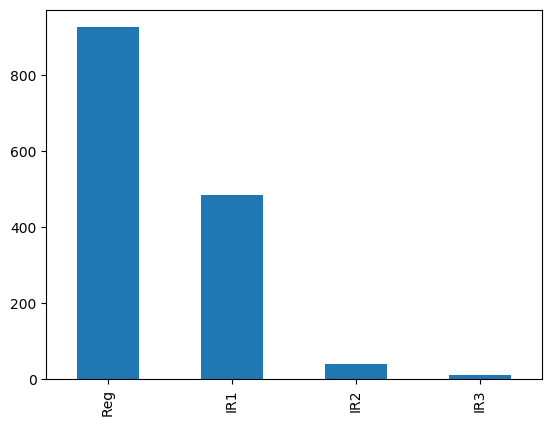

In [18]:
#Next Categorical Feature
"""LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
"""
print(dataset["LotShape"].unique())
print(dataset["LotShape"].value_counts())
print("Nan Values  " + str(dataset.LotShape.isna().sum()))
dataset["LotShape"].value_counts().plot(kind='bar')
plt.show()

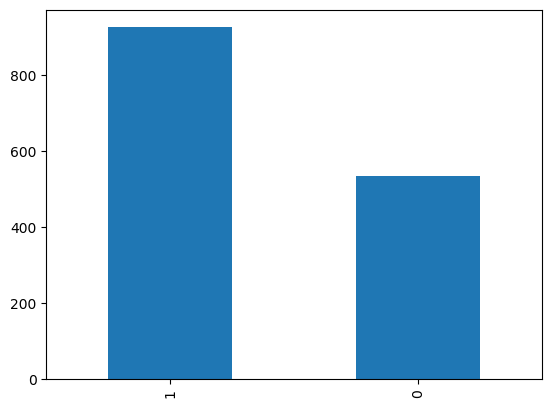

In [19]:
#We will categorize this feature with a binary manner, such as regular :1 and irregular(others):0
LotShape=dataset.pop("LotShape")
LotShape=LotShape.map({"Reg":1,'IR1':0,'IR2':0, 'IR3':0})
#Let's see the result
LotShape.value_counts().plot(kind='bar')
plt.show()

In [20]:
preprocessedDataset["LotShape"]=LotShape.copy().astype(float)

['Lvl' 'Bnk' 'Low' 'HLS']
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Nan Values  0


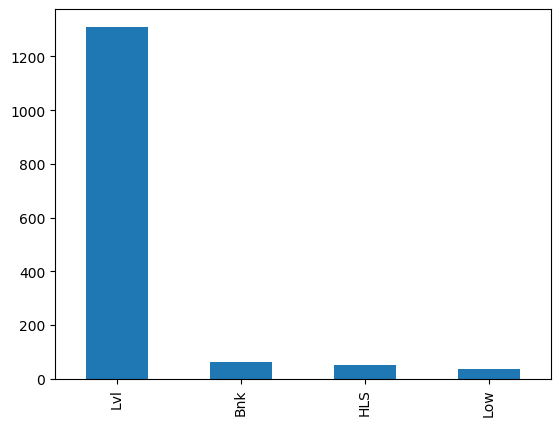

In [26]:
#Next Categorical Feature
"""LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
"""
print(dataset["LandContour"].unique())
print(dataset["LandContour"].value_counts())
print("Nan Values  " + str(dataset.LandContour.isna().sum()))
dataset["LandContour"].value_counts().plot(kind='bar')
plt.show()

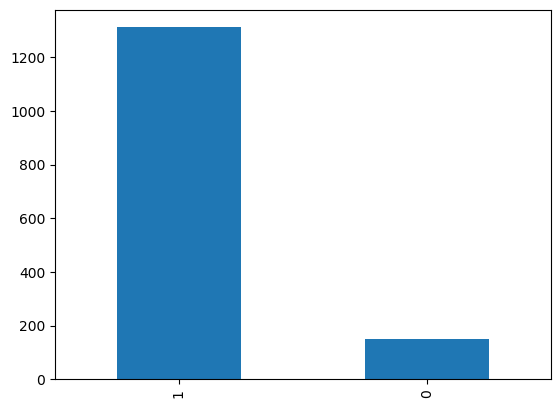

In [27]:
#Feature seems intense with respect to "Lvl" value. It is so early to eliminate this feaure right now, so I will keep it later after checking feature elimination approaches and maybe model improvement
#We will categorize this feature with a binary manner, such as Lvl :1 and others:0
LandContour=dataset.pop("LandContour")
LandContour=LandContour.map({"Lvl":1,'Bnk':0,'HLS':0, 'Low':0})
#Let's see the result
LandContour.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["LandContour"]=LandContour.copy().astype(float)

['AllPub' 'NoSeWa']
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Nan Values  0


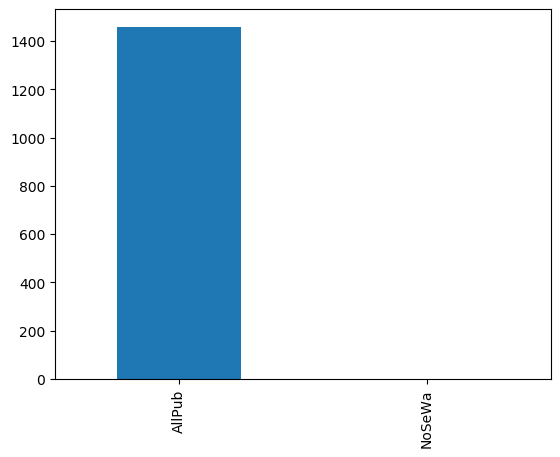

In [28]:
#Next Categorical Feature
"""Utilities: Type of utilities available

       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only
"""
print(dataset["Utilities"].unique())
print(dataset["Utilities"].value_counts())
print("Nan Values  " + str(dataset.Utilities.isna().sum()))
dataset["Utilities"].value_counts().plot(kind='bar')
plt.show()

In [29]:
#We will simply drop it due to non-informatic
dataset=dataset.drop(columns=["Utilities"])

['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Nan Values  0


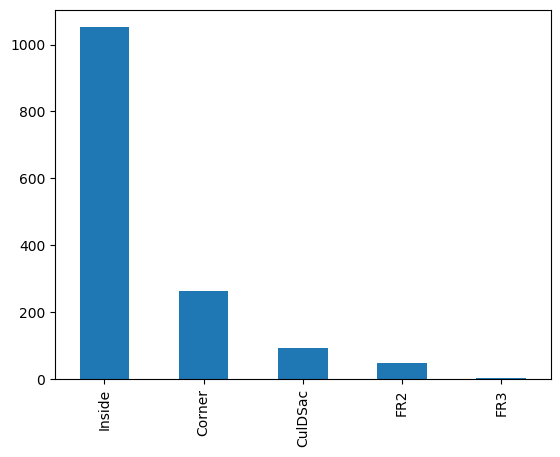

In [30]:
#Next Categorical Feature
"""LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
"""
print(dataset["LotConfig"].unique())
print(dataset["LotConfig"].value_counts())
print("Nan Values  " + str(dataset.LotConfig.isna().sum()))
dataset["LotConfig"].value_counts().plot(kind='bar')
plt.show()

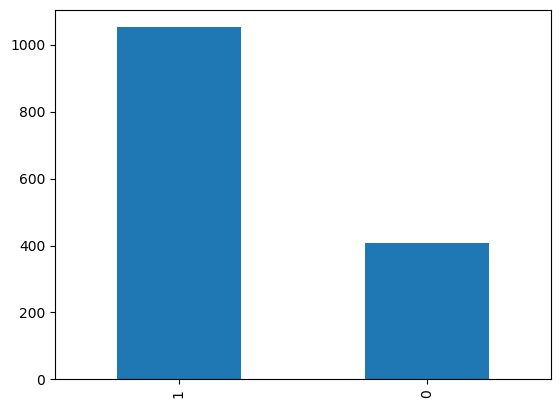

In [31]:
#We will categorize this feature with a binary manner, such as Inside :1 and others:0
LotConfig=dataset.pop("LotConfig")
LotConfig=LotConfig.map({"Inside":1,'Corner':0,'CulDSac':0, 'FR2':0, 'FR3':0})
#Let's see the result
LotConfig.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["LotConfig"]=LotConfig.copy().astype(float)

['Gtl' 'Mod' 'Sev']
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Nan Values  0


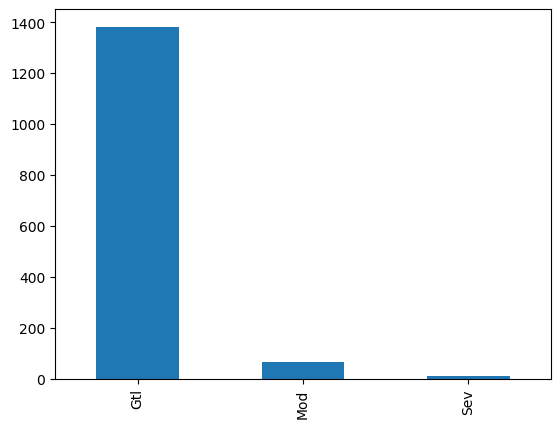

In [32]:
#Next Categorical Feature
"""LandSlope: Slope of property

       Gtl	Gentle slope
       Mod	Moderate Slope
       Sev	Severe Slope
"""
print(dataset["LandSlope"].unique())
print(dataset["LandSlope"].value_counts())
print("Nan Values  " + str(dataset.LandSlope.isna().sum()))
dataset["LandSlope"].value_counts().plot(kind='bar')
plt.show()

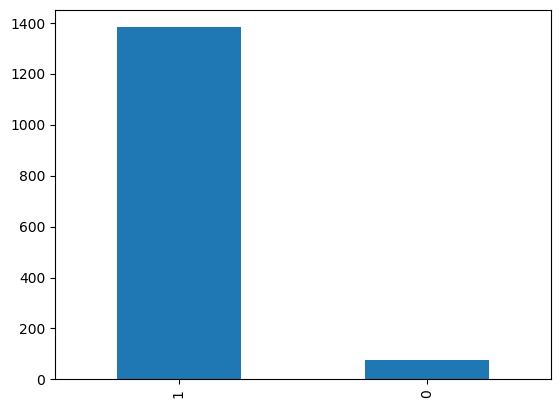

In [33]:
#We will categorize this feature with a binary manner, such as Lvl :1 and others:0
LandSlope=dataset.pop("LandSlope")
LandSlope=LandSlope.map({"Gtl":1,'Mod':0,'Sev':0})
#Let's see the result
LandSlope.value_counts().plot(kind='bar')
plt.show()
preprocessedDataset["LandSlope"]=LandSlope.copy().astype(float)

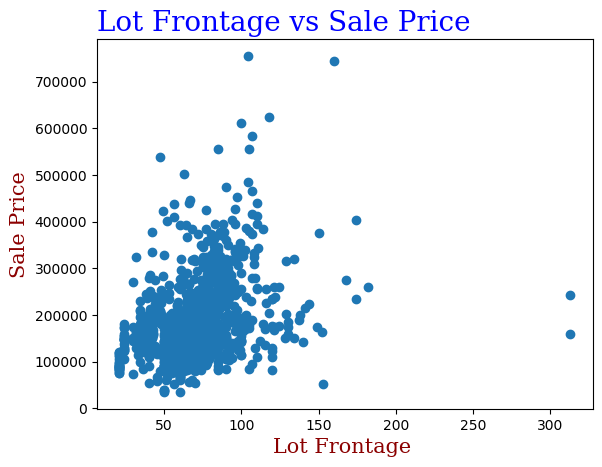

In [21]:
#Next Feature : LotFrontage: Continious-Ratio
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Lot Frontage vs Sale Price", fontdict = font1, loc = 'left')# default loc="middle"
plt.xlabel("Lot Frontage ", fontdict = font2)
plt.ylabel("Sale Price", fontdict = font2)
plt.scatter(dataset['LotFrontage'],dataset["SalePrice"])
plt.show()
#Linearity with some outliers...
preprocessedDataset["LotFrontage"]=dataset['LotFrontage'].copy().astype(float)

In [22]:
#Next Feature: LotArea: Lot size in square feet
LotArea=dataset.LotArea.copy()
LotArea.isna().sum()

0

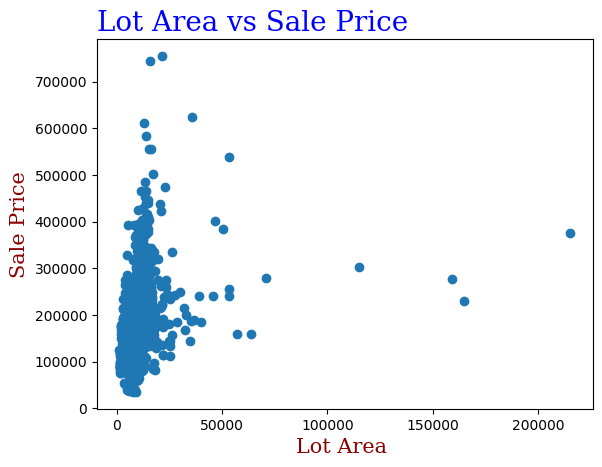

In [23]:
plt.title("Lot Area vs Sale Price", fontdict = font1, loc = 'left')# default loc="middle"
plt.xlabel("Lot Area ", fontdict = font2)
plt.ylabel("Sale Price", fontdict = font2)
plt.scatter(dataset['LotArea'],dataset["SalePrice"])
plt.show()

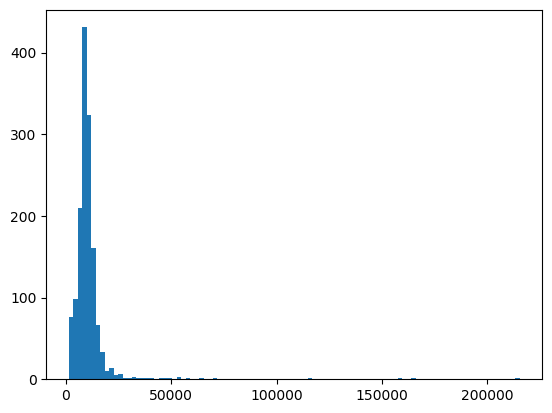

In [24]:
#It looks like there are some misleading data because Lot area 200000 looks enourmous.
#So,we will decide the outliers and change outliers with median of the Lot Size data.
plt.hist(np.array(dataset[['LotArea']]),bins=100)
plt.show()